<a href="https://colab.research.google.com/github/WeebMogul/Senku-Sentiment-Analyzer-2.0/blob/master/Senku_Sentiment_Analyzer_2_0_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.neighbors import KNeighborsClassifier
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV
from sklearn.metrics import make_scorer,precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
from sklearn.utils import resample,shuffle
import pandas as pd
import string
import matplotlib.pyplot as pypl
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.text import Tokenizer

In [8]:
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [0]:
contract = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

stopword = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def penntag(pen):
    morphy_tag = {'NN': 'n', 'JJ': 'a',
                  'VB': 'v', 'RB': 'r'}
    try:
        return morphy_tag[pen[:2]]
    except:
        return 'n'
def stopword_remover(comm, comment_array):
    stopwords_removed = [word for word in comm.lower().split() if word not in stopword]
    megos = ' '.join(word for word in stopwords_removed)
    comment_array.append(megos)
    return comment_array
def comment_cleaner(comm, comment_array):
    temp_comm = []
    uncontracted = ' '.join([contract[word] if word in contract else word for word in comm.lower().split()])
    stopwords_removed = [word for word in uncontracted.lower().split() if word not in stopword]
    POS_words = nltk.pos_tag(stopwords_removed)
    for i in range(0, len(POS_words)):
        lemmas = lemma.lemmatize(POS_words[i][0], pos=penntag(POS_words[i][1]))
        temp_comm.append(lemmas)
    # print(temp_comm)
    megos = ' '.join(word for word in temp_comm)
    comment_array.append(temp_comm)
    return megos
    #comment_array.clear()


In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [33]:
df1 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 1 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df2 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 2 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df3 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 3 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df4 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 4 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df5 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 5 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df6 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 6 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df7 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 7 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df8 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 8 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df9 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 9 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df10 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 10 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df11 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 11 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df12 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 12 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df13 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 13 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df14 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 14 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df15 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 15 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df16 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 16 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df17 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 17 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df18 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 18 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df19 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 19 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df20 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 20 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df21 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 21 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df22 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 22 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df23 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 23 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')
df24 = pd.read_csv(
    '/content/drive/My Drive/Dr. Stone/Dr.Stone Episode 24 Comment list with Sentiment rating.csv',
    index_col=0, encoding='utf-8-sig')

#dfa12 = pd.concat([df1, df2, df3, df4, df5, df6,df7, df8, df9, df10, df11, df12])
dfa12 = pd.concat(
    [df1, df2, df3, df4, df5, df6
     ])
df25 = pd.concat([df13, df14, df15, df16, df17, df18,df19, df20, df21, df22, df23, df24])
#df25 = pd.concat([df13, df14, df15, df16, df17, df18])

df12 = pd.concat([dfa12])

max_feat = 60000
train_array = []
test_array = []
train_target = []
comtest_array = []
    # df = df.sample(frac=1)
    # Convert dataframe values into string
df12 = df12[['Comment', 'Sentiment Rating']]
df12['Comment'] = df12['Comment'].astype(str)
df12['Length'] = df12['Comment'].apply(len)
df12 = df12[df12['Length'] > 5]
#df12['Comment'] = df12['Comment'].apply(lambda s: comment_cleaner(s, train_array))

    # Remove punctuation marks and tokenize each and every word
df12['Comment'] = df12['Comment'].str.replace('[^\w\s]', ' ')
df12['Comment'] = df12['Comment'].str.replace('[\d+]', ' ')
df12['Comment'] = df12['Comment'].str.replace('(^| ).(( ).)*( |$)', ' ')


    # Split into positive and negative datasets
pos_df = df12[df12['Sentiment Rating'] == 1]
neg_df = df12[df12['Sentiment Rating'] == 0]
neu_df = df12[df12['Sentiment Rating'] == 2]


    #neu_df['Comment'] = neu_df['Comment'].
df_len = len(pos_df)

train_df = pd.concat([pos_df, neg_df,neu_df])
    #train_df = pd.concat([pos_df, neg_df,neu_df])
train_df = train_df.reset_index(drop=True)

x = train_df['Comment'].values
y = train_df['Sentiment Rating'].values
print(train_df.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=22)
print(x_train[1])

vec = TfidfVectorizer(ngram_range=(1, 2),sublinear_tf=True,max_features=max_feat)
#vec = CountVectorizer(ngram_range=(1, 2)) 
x_tr = vec.fit_transform(x_train)
x_ts = vec.transform(x_test)

sm = RandomOverSampler(random_state=22)

X_train_res, y_train_res = sm.fit_sample(x_tr, y_train)

(6155, 3)
Solid first episode 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 50)                3000050   
_________________________________________________________________
dense_76 (Dense)             (None, 3)                 153       
Total params: 3,000,203
Trainable params: 3,000,203
Non-trainable params: 0
_________________________________________________________________
Train on 6939 samples, validate on 1231 samples
Epoch 1/25
6939/6939 [==============================] - 3s 376us/sample - loss: 1.0984 - acc: 0.3400 - val_loss: 1.1008 - val_acc: 0.2234
Epoch 2/25
6939/6939 [==============================] - 2s 328us/sample - loss: 1.0967 - acc: 0.3859 - val_loss: 1.1118 - val_acc: 0.1186
Epoch 3/25
6939/6939 [==============================] - 2s 328us/sample - loss: 1.0947 - acc: 0.4358 - val_loss: 1.0955 - val_acc: 0.4208
Epoch 4/25
6939/6939 [=====================

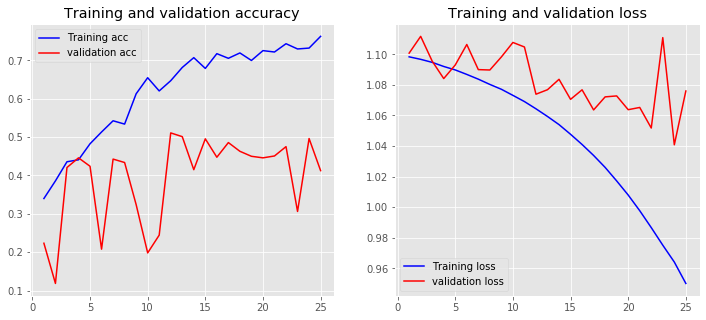

Training Accuracy: 0.6789
Testing Accuracy:  0.4127
<function confusion_matrix at 0x7f024c5929d8>
[[ 93   6  47]
 [216 100 233]
 [186  35 315]]


In [50]:
custom_sgd = keras.optimizers.SGD(lr=0.1)

input_dim = x_tr.shape[1]
model = keras.Sequential()
model.add(keras.layers.Dense(50, activation='relu',input_dim = max_feat))
model.add(keras.layers.Dense(3,activation='softmax'))
model.compile(optimizer=custom_sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

#6 episodes -  Batch size is 150 and epochs is 25
#12 episodes - Batch size is 200 and epochs is 25
#18 episodes - Batch size is 250 and epochs is 35
#24 episodes - Batch size is 300 and epochs is 40
fitmodel = model.fit(X_train_res, y_train_res, epochs=25, batch_size=150, validation_data = (x_ts,y_test), verbose=1)


results = model.evaluate(x_ts, y_test)
print(results)


import matplotlib.pyplot as pypl
pypl.style.use('ggplot')

print(fitmodel.history.keys())

acc = fitmodel.history['acc']
val_acc = fitmodel.history['val_acc']
loss = fitmodel.history['loss']
val_loss = fitmodel.history['val_loss']

x = range(1,len(acc)+ 1)

pypl.figure(figsize=(12,5))
pypl.subplot(1,2,1)
pypl.plot(x,acc,'b',label = 'Training acc')
pypl.plot(x,val_acc,'r',label = 'validation acc')
pypl.title('Training and validation accuracy')
pypl.legend()
pypl.subplot(1, 2, 2)
pypl.plot(x,loss,'b',label = 'Training loss')
pypl.plot(x,val_loss,'r',label = 'validation loss')
pypl.title('Training and validation loss')
pypl.legend()
pypl.show()

loss, accuracy = model.evaluate(X_train_res, y_train_res, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_ts, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print(confusion_matrix)

prima = model.predict_classes(x_ts)
print(confusion_matrix(y_test,prima))